In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data',
                 header=None)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


      1. #3  (age)       
      2. #4  (sex)       
      3. #9  (cp)        chest pain
      4. #10 (restbp)  resting blood pressure (mm Hg)
      5. #12 (chol)      serum holestoral mg/dl
      6. #16 (fbs)       fasting blood sugar
      7. #19 (restecg)   resting electrocardiographic results
      8. #32 (thalach)   maximum heart rate achieved
      9. #38 (exang)     exercise induced angina (1 = yes; 0 = no)
      10. #40 (oldpeak)  ST depression induced by exercise relative to rest
      11. #41 (slope)    the slope of the peak exercise ST segment
      12. #44 (ca)       number of major vessels (0-3) colored by flourosopy
      13. #51 (thal)     3 = normal; 6 = fixed defect; 7 = reversable defect
      14. #58 (hd)       (the predicted attribute)


In [14]:
df.columns = ['age',
             'sex',
             'cp',
             'restbp',
             'chol',
             'fbs',
             'restecg',
             'thalach',
             'exang',
             'oldpeak',
             'slope',
             'ca',
             'thal',
             'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [15]:
#@title Deal with Missing Data

df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [16]:
df['ca'].unique() #so we can see that there is missing data present

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [17]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [18]:
## print the number of rows that contain missing values

len(df.loc[(df['ca'] == '?')
            |
           (df['thal'] == '?')])

6

In [19]:
df.loc[(df['ca'] == '?')
        |
       (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [20]:
len(df)

303

In [22]:
df_no_missing = df.loc[(df['ca'] != '?')
                        &
                       (df['thal'] != '?')]
len(df_no_missing)
# because we have sufficient data we just removed rows with missing data

297

In [23]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [26]:
X = df_no_missing.drop('hd', axis=1).copy()
X.head()
# alternatively: X = df_no_missing.iloc[:,:-1]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [25]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [28]:
X_onehot = pd.get_dummies(X, columns=['cp',
                                      'restecg',
                                      'slope',
                                      'thal'])
X_onehot.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [29]:
y.unique()

array([0, 2, 1, 3, 4])

In [30]:
y[y > 0] = 1
y.unique()

array([0, 1])

In [35]:
#@title Build a tree

import sklearn.model_selection
import sklearn.tree

# split data
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X_onehot, y, random_state=42)

clf_dt = sklearn.tree.DecisionTreeClassifier(random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.5732758620689655, 0.9583333333333334, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(0.33189655172413796, 0.875, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(0.2025862068965517, 0.7916666666666666, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(0.14655172413793102, 0.7083333333333334, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(0.08620689655172414, 0.625, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(0.05172413793103448, 0.5416666666666666, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(0.034482758620689655, 0.4583333333333333, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(0.017241379310344827, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(0.05172413793103448, 0.375, 'exang <= 0.5\ngini = 0.

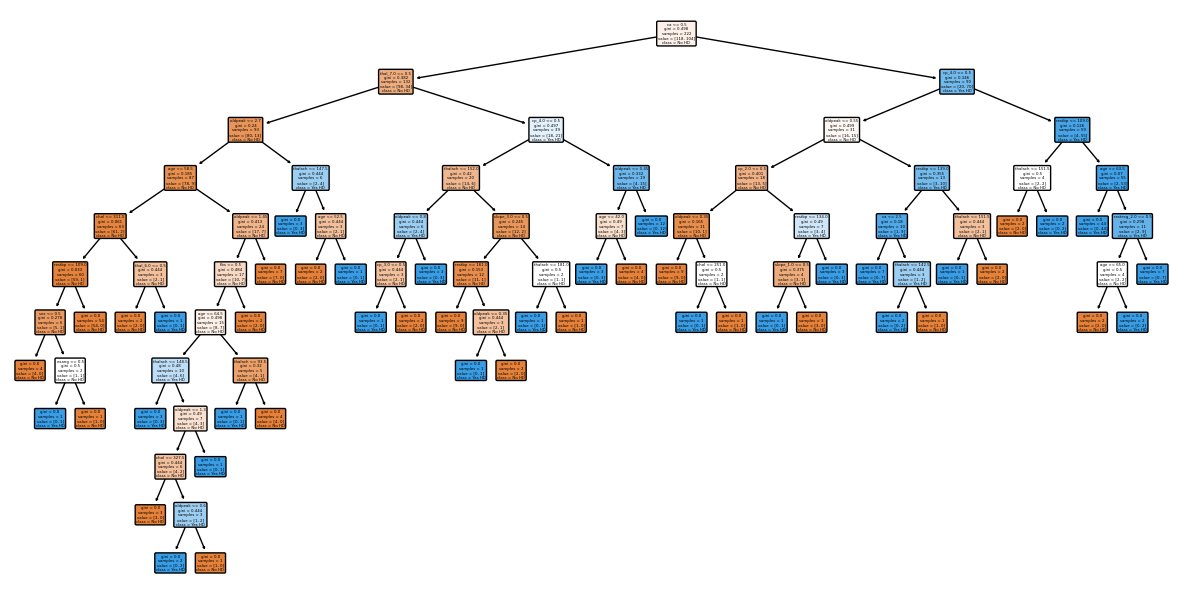

In [36]:
plt.figure(figsize=(15, 7.5))
sklearn.tree.plot_tree(clf_dt,
          filled=True,
          rounded=True,
          class_names=["No HD", "Yes HD"],
          feature_names=X_onehot.columns)

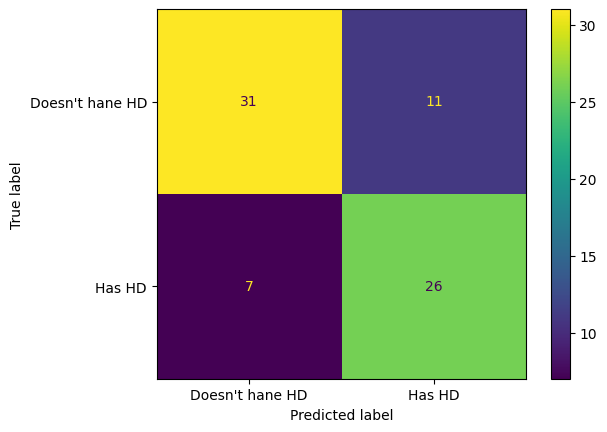

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Doesn't hane HD", "Has HD"])
disp.plot()
plt.show()

In [46]:
#@title Cost Complexity Pruning

path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # determine values for alpha hyperparam
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] # exclude the maximum alpha

clf_dts = [] #array for trees

# create one tecision tree per alpha value and store in the list
for ccp_alpha in ccp_alphas:
  clf_dt = sklearn.tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  clf_dt.fit(X_train, y_train)
  clf_dts.append(clf_dt)

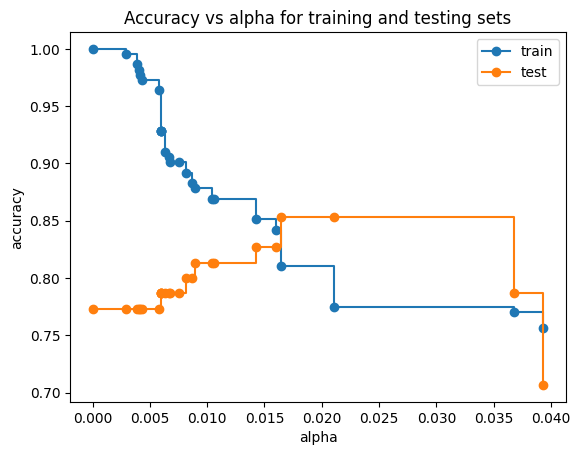

In [47]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()


<Axes: xlabel='tree'>

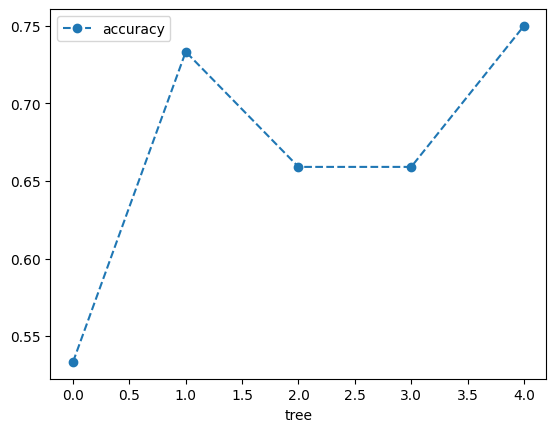

In [48]:
#@title Cross-validation

scores = sklearn.model_selection.cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})
df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The graph above shows that using different Trainig and Testing data splits with the same alpha resulted in different accuracies, suggesting that alpha is sensitive to datasets. So, instead of picking the single training dataset and single Testing dataset, we use cross validation

<Axes: xlabel='alpha'>

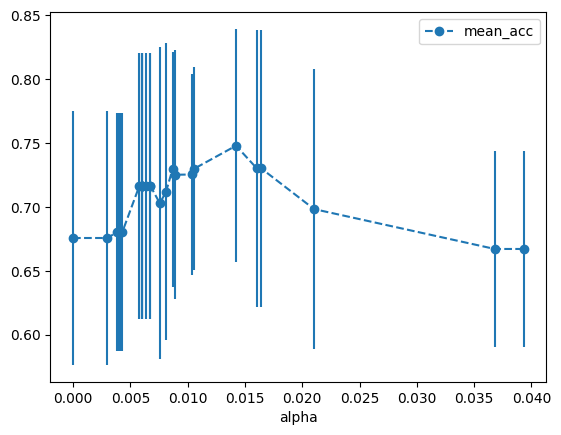

In [49]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
  clf_dt = sklearn.tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
  scores = sklearn.model_selection.cross_val_score(clf_dt, X_train, y_train, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean_acc', 'std'])

alpha_results.plot(x='alpha',
                   y='mean_acc',
                   yerr='std',
                   marker='o',
                   linestyle='--')